Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's

# Real Estate Price Predictor

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [31]:
housing_df = pd.read_csv(r"C:/Users/AA/DataScience/datasets/dragon_house.csv")
housing_df.head() 

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

In [32]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [33]:
housing_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [34]:
#we have 5 row with empty value so we fill empty data with median
housing_df["RM"].fillna(housing_df['RM'].median(),inplace=True)

In [35]:
housing_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [36]:
housing_df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.283587   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702126   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208000   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.618750   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

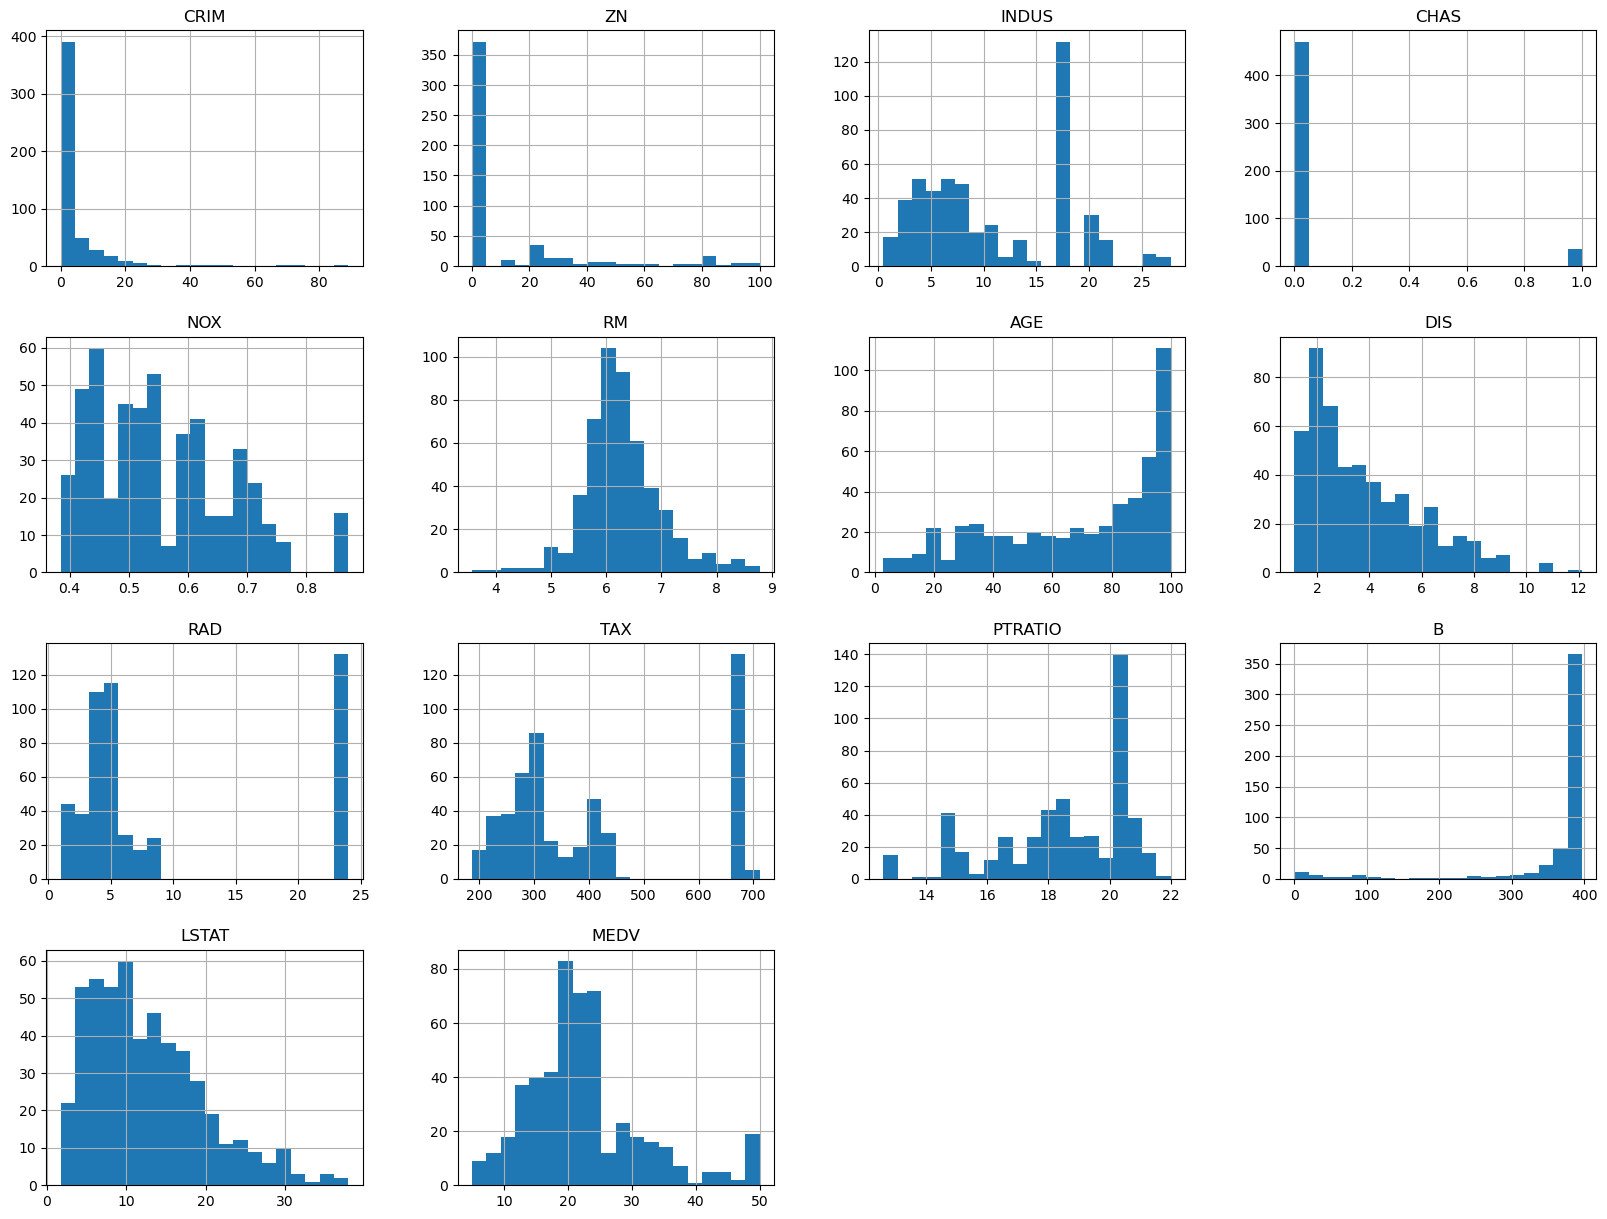

In [37]:
#drawing histogram of the features
housing_df.hist(bins=20,figsize=(20,15))

# Correlation Heatmap

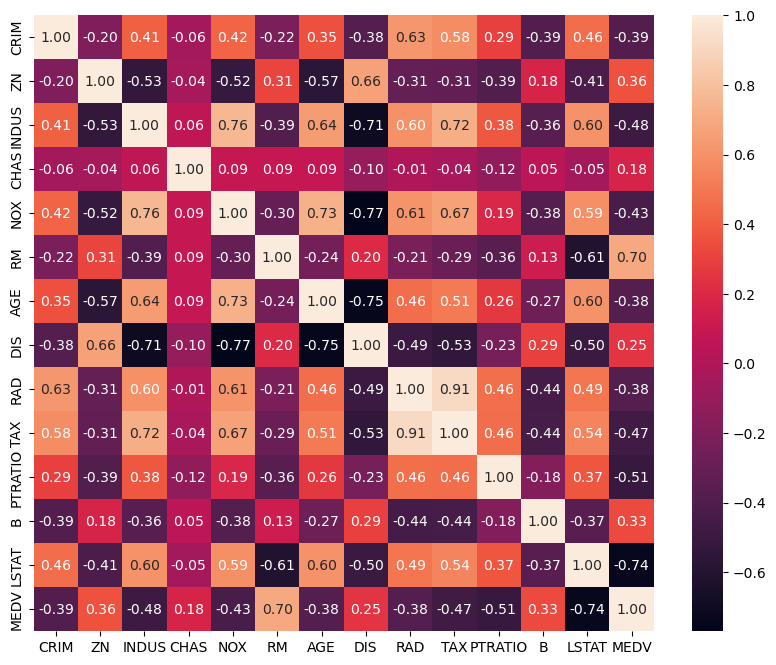

In [38]:
#heatmap to find how much features are correlated
plt.figure(figsize=(10,8))
corr_matrix = housing_df.corr()
sns.heatmap(corr_matrix,annot=True,fmt=".2f")
plt.show()

In [39]:
#or we can see values that correlates with target as 
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695668
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

Here, we get RM as highly correlated and LSTAT as highly negatively correlated

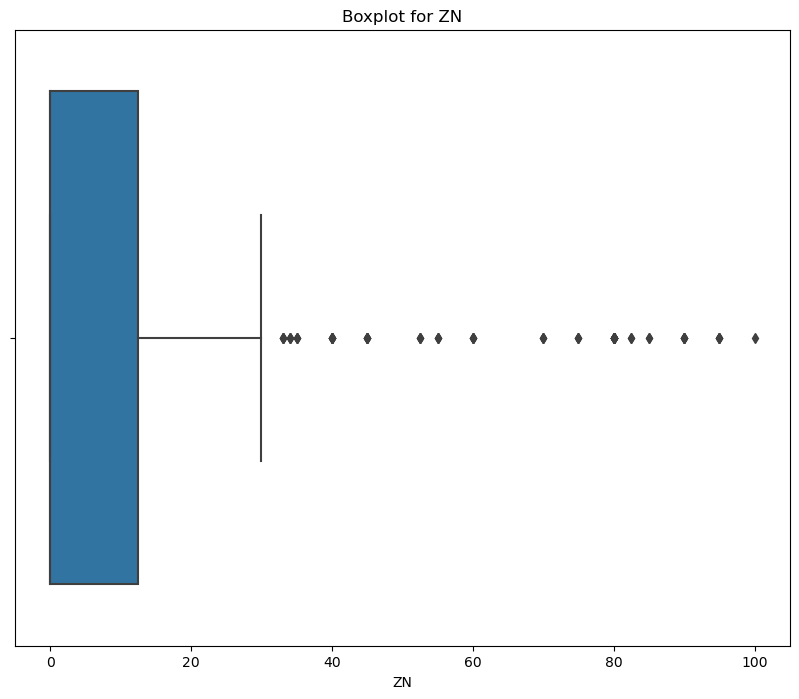

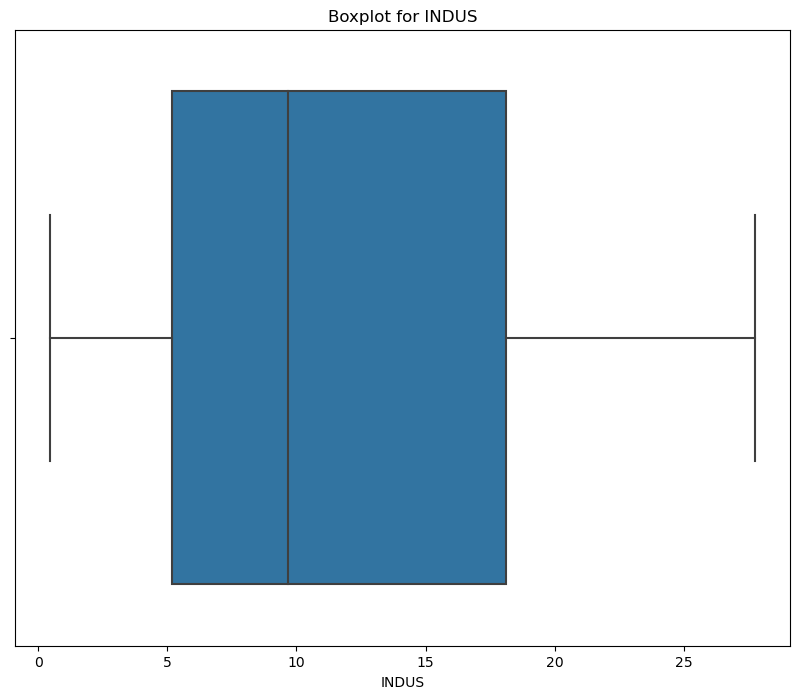

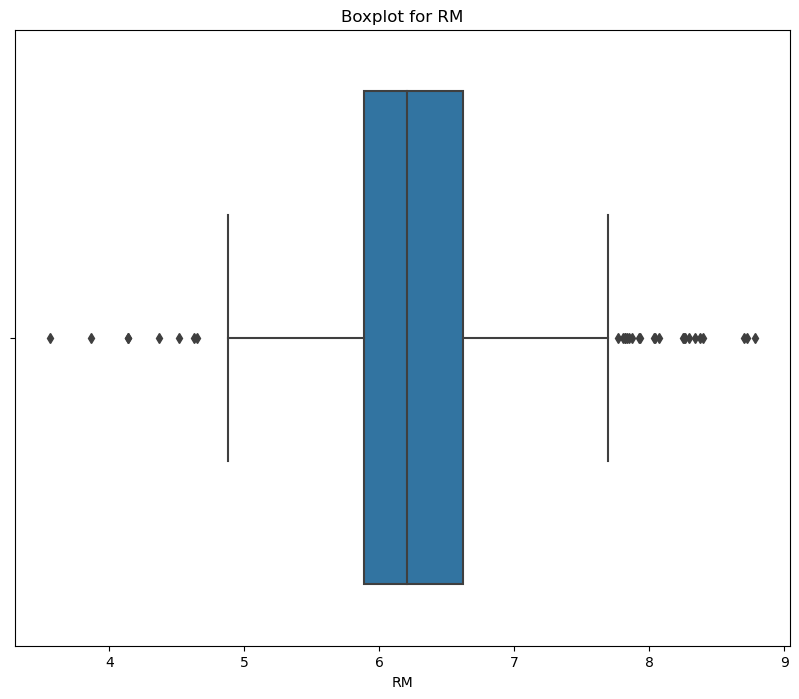

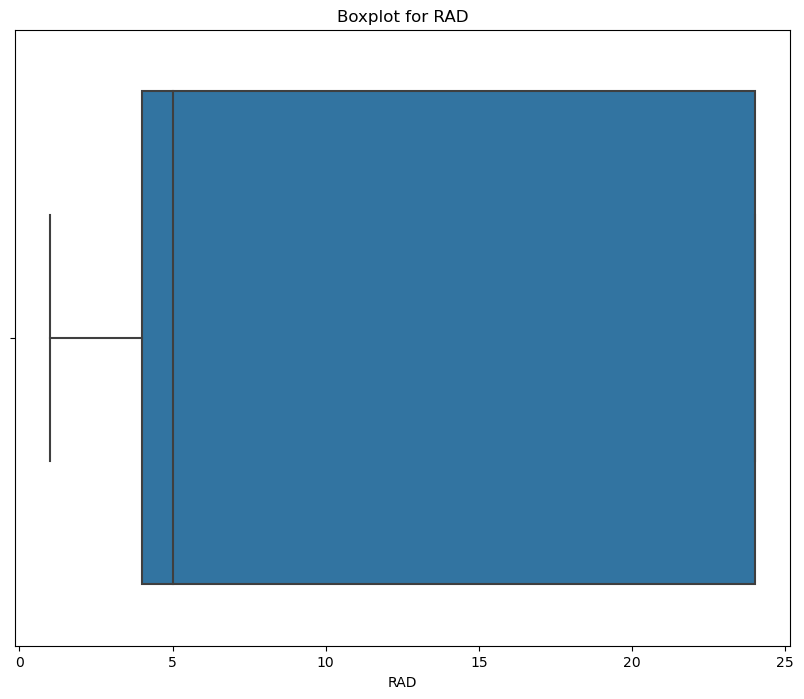

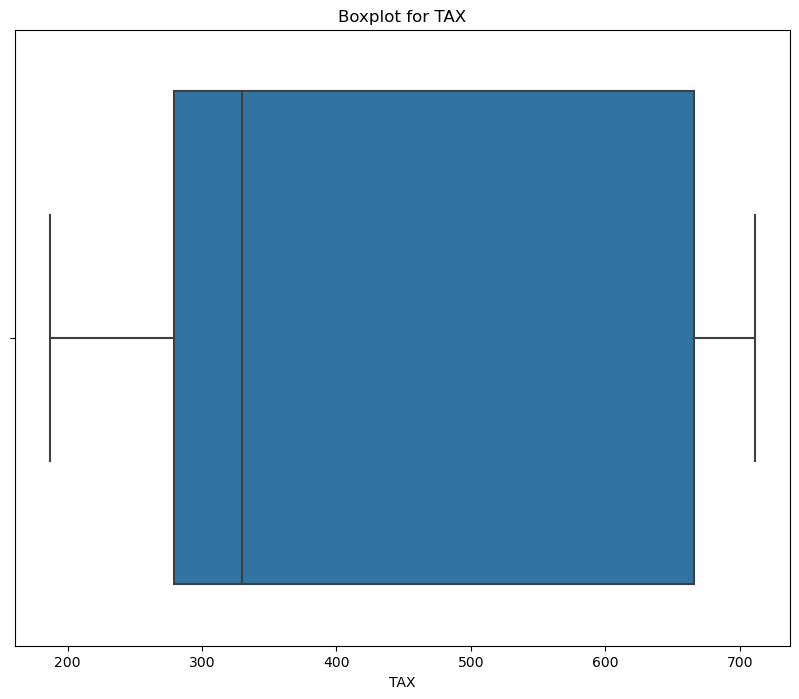

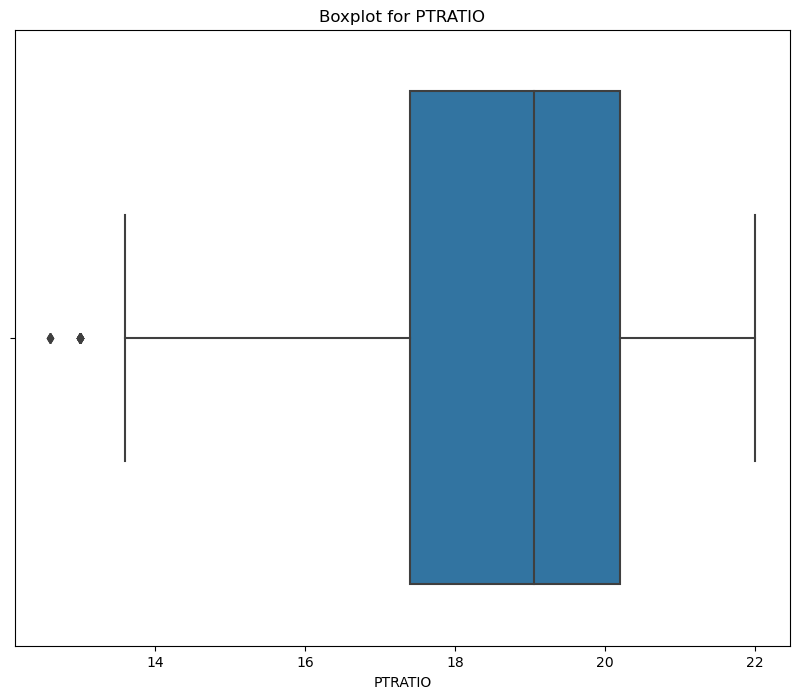

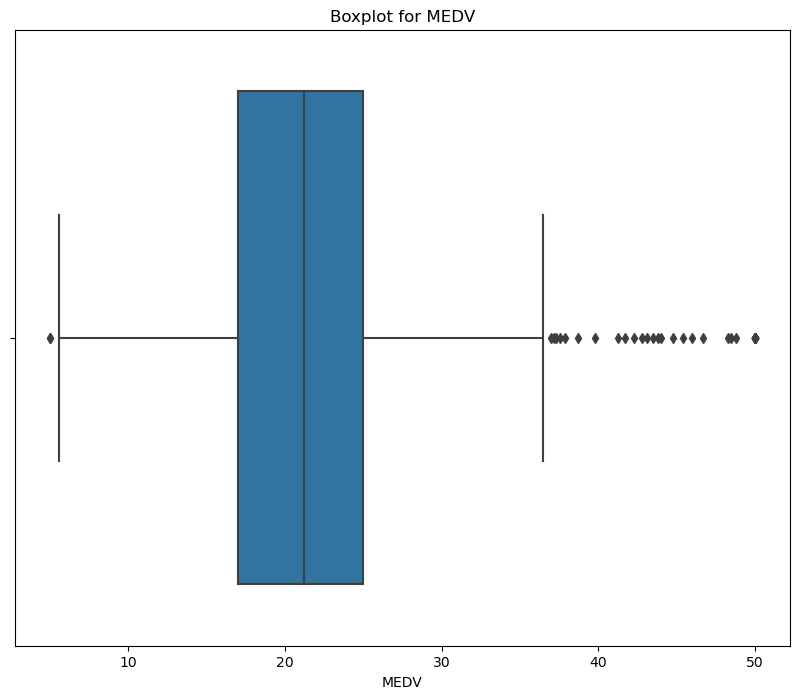

In [40]:
#BOXPLOT
for column in housing_df.columns:
    plt.figure(figsize=(10,8))
    sns.boxplot(x=housing_df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_feature = housing_df.drop(['MEDV'],axis=1)
y_target=housing_df['MEDV']

In [43]:
x_feature_train,x_feature_test,y_train,y_test=train_test_split(x_feature,y_target,test_size=0.3,random_state=42)

In [68]:
#logistic  regression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [45]:
model=LinearRegression()

In [46]:
model.fit(x_feature_train,y_train)

LinearRegression()

In [47]:
prediction = model.predict(x_feature_test)

In [48]:
prediction

array([28.63772945, 36.47857848, 15.43766279, 25.39025687, 18.85880766,
       23.15353596, 17.39916824, 14.08796831, 23.04414907, 20.59203273,
       24.83572955, 18.55982325, -6.85796952, 21.8093299 , 19.22512001,
       26.18660409, 20.29182908,  5.62402871, 40.44043596, 17.58233303,
       27.42220553, 30.15583512, 10.94623567, 24.00581759, 18.07657692,
       15.9410179 , 23.12385972, 14.56112797, 22.34492556, 19.31836051,
       22.15882093, 25.18373878, 25.30929982, 18.51296403, 16.63024975,
       17.51646175, 30.94625521, 20.17966865, 23.90563291, 24.85709467,
       13.93421337, 31.804198  , 42.55952194, 17.62681953, 27.00318307,
       17.19252842, 13.80663458, 26.09058558, 20.3214768 , 30.07973938,
       21.33642652, 34.1490934 , 15.60587972, 26.09643767, 39.30061191,
       22.99298781, 18.96077165, 33.03828656, 24.84048609, 12.94105243,
       20.44051523, 30.80640124, 31.60751974, 16.27761694, 21.09880182,
       16.59283983, 20.36478006, 26.14403105, 31.05150238, 11.98

In [49]:
accuracy = model.score(x_feature_test,y_test)
accuracy

0.7098661844612948

In [59]:
model.predict([[0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03]])

C:\Users\AA\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([30.94625521])

# Features Scaling

1 .Min-max (Normalization)

   (value-min)/(max-min)
   
   MinMaxScaler
   
   (0-1)

2. Standardization

   (value-mean)/sd
   
   StandardScaler

In [51]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

my_pipeline = Pipeline([('imputer',SimpleImputer(strategy='median')),
                       ('std_scaler',StandardScaler()),
                       ])

Evaluating the model

In [64]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,prediction)

In [65]:
mse

21.618768724705443

In [66]:
rmse = np.sqrt(mse)

In [67]:
rmse

4.649598770292491

In [69]:
tree_model = DecisionTreeRegressor()

In [70]:
tree_model.fit(x_feature_train,y_train)

DecisionTreeRegressor()

In [71]:
tree_pred = tree_model.predict(x_feature_test)
tree_pred

array([22. , 33.1, 13.3, 25. , 19.4, 20.7, 22.5, 14.9, 23. , 21.2, 20.5,
       20.5,  5.6, 20.7, 16.2, 25. , 15.2,  7.4, 50. , 16.7, 24.1, 22.1,
       14.6, 23.8, 12.7, 14.4, 23.9, 13.4, 21.7, 21.2, 19.5, 23.1, 17.8,
       16.2, 14.6, 15.6, 33.4, 19. , 20.4, 24.7, 19.8, 28.4, 50. , 18.7,
       22. , 12.7, 14.6, 25. , 20. , 32. , 22.9, 34.9, 19.4, 28.4, 43.1,
       20.6, 17.4, 22.8, 22. , 22.5, 19.6, 33. , 29.8, 18.2, 27.9, 14.4,
       15.4, 22.9, 22.8, 13.4, 22.6, 28.7, 10.5, 23.7, 21.1,  5. , 19.6,
       43.8, 13.3,  8.1, 22. , 11.9, 23.4, 10.5, 20.3, 29.9, 19. , 23.1,
       22.1, 18. , 22.6,  5.6, 19.2, 17.5, 23.3, 18.4, 50. , 11.9, 16.7,
       13.9, 19.7, 25. , 14.4, 20.4, 26.4, 10.2, 20.4, 24.8, 19. , 21.9,
       11.8, 13.9, 22.2, 29.6, 31.7, 19. , 50. , 14.8, 16.2, 23.7, 16.1,
       24.8,  5.6, 18.5, 24.7, 23.1, 23.3, 37.2, 21.4, 43.8, 15.2, 25. ,
       18.2, 18.1, 14.6, 20.2, 19. , 30.5, 29.8, 16. , 21.7, 23.5, 19.3,
       16.6,  5.6, 18.9, 15.6,  8.5, 16.7, 44.8, 19

In [72]:
accuracy_tree = tree_model.score(x_feature_test,y_test)
accuracy_tree

0.8438979799698709

In [73]:
mse_tree = mean_squared_error(y_test,tree_pred)
mse_tree

11.631644736842105

In [75]:
rmse_tree = np.sqrt(mse_tree)
rmse_tree

3.4105197165303274